In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [21]:
df = pd.read_csv('netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


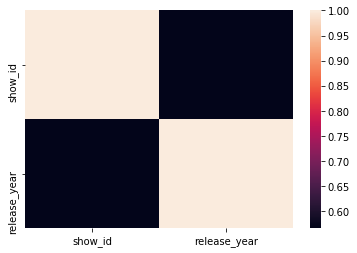

In [23]:
sns.heatmap(df.corr())

In [9]:
#convert date_added column from object type to datetime64 type
df.date_added = pd.to_datetime(df.date_added)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [14]:
X = df.drop(['show_id','rating'], axis=1)

In [16]:
X.fillna(0, inplace=True)

In [19]:
X.drop('description', axis=1)

,type,title,director,cast,country,date_added,release_year,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09 00:00:00,2019,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,0,Jandino Asporaat,United Kingdom,2016-09-09 00:00:00,2016,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,0,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08 00:00:00,2013,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,0,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08 00:00:00,2016,1 Season,Kids' TV
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08 00:00:00,2017,99 min,Comedies
...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,0,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,0,2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,Maron,0,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,0,2016,4 Seasons,TV Comedies
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,0,0,0,0,2016,60 min,Movies
6232,TV Show,A Young Doctor's Notebook and Other Stories,0,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,0,2013,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [20]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

ValueError: could not convert string to float: 'This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.'